<a href="https://colab.research.google.com/github/08989/code-alpha/blob/main/code_alpha_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 2: Unemployment Analysis with Python

NAME : PARTH BHADAURIA

BATCH : JULY

DOMAIN : DATA SCIENCE

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.info()
df.columns = ['State', 'Date', 'Frequency', 'Estimated_Unemployment_Rate',
              'Estimated_Employed', 'Estimated_Labour_Participation_Rate', 'Region', 'Longitude', 'Latitude']
df['Date'] = pd.to_datetime(df['Date'])
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


/tmp/ipython-input-4-2474709618.py:4: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,0
State,0
Date,0
Frequency,0
Estimated_Unemployment_Rate,0
Estimated_Employed,0
Estimated_Labour_Participation_Rate,0
Region,0
Longitude,0
Latitude,0


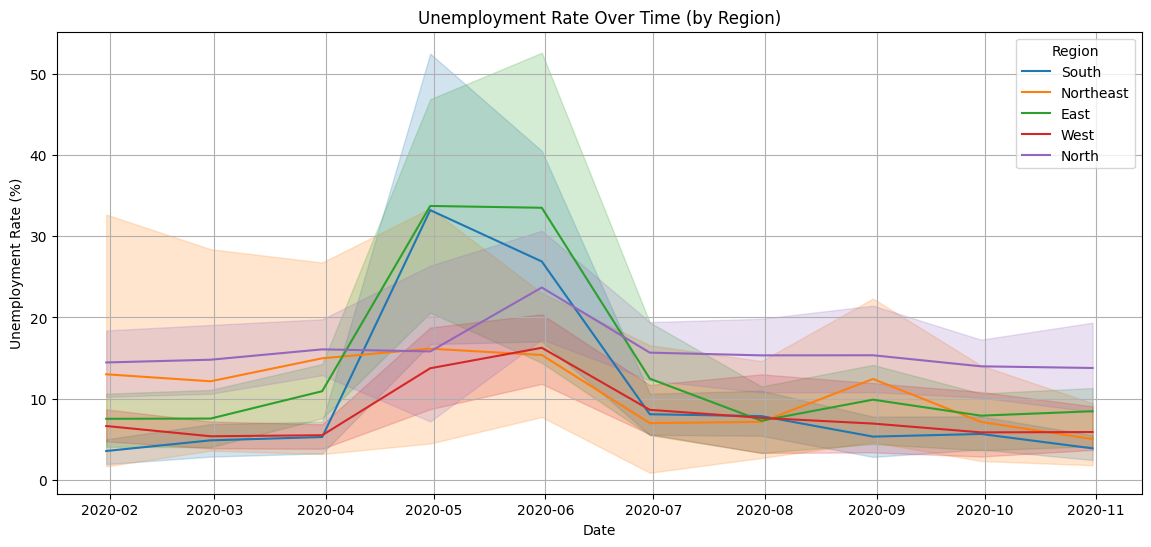

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Estimated_Unemployment_Rate', hue='Region')
plt.title('Unemployment Rate Over Time (by Region)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


/tmp/ipython-input-6-22383931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette='magma')


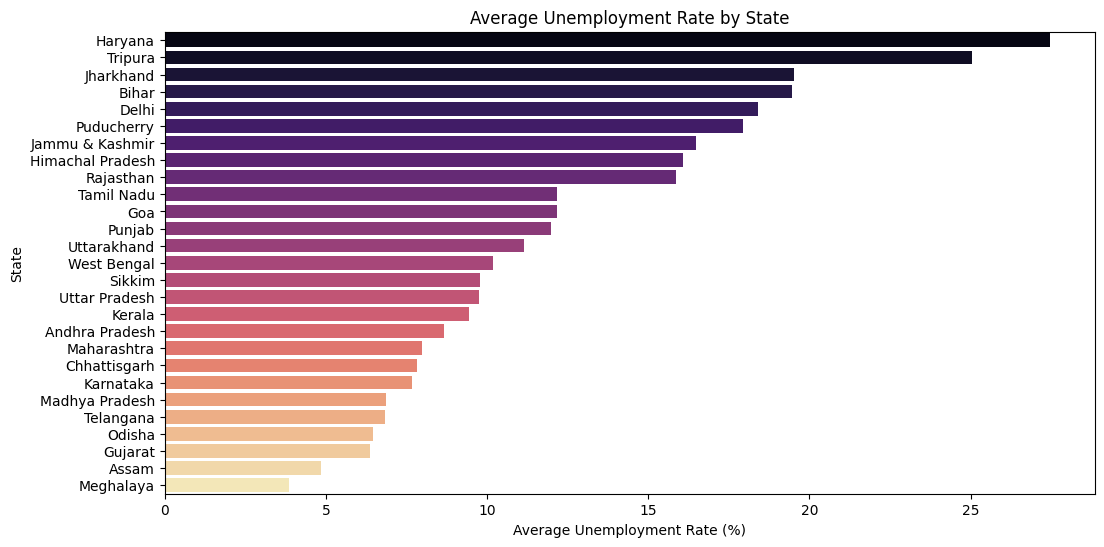

In [ ]:
plt.figure(figsize=(12, 6))
state_avg = df.groupby('State')['Estimated_Unemployment_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=state_avg.values, y=state_avg.index, palette='magma')
plt.title('Average Unemployment Rate by State')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State')
plt.show()


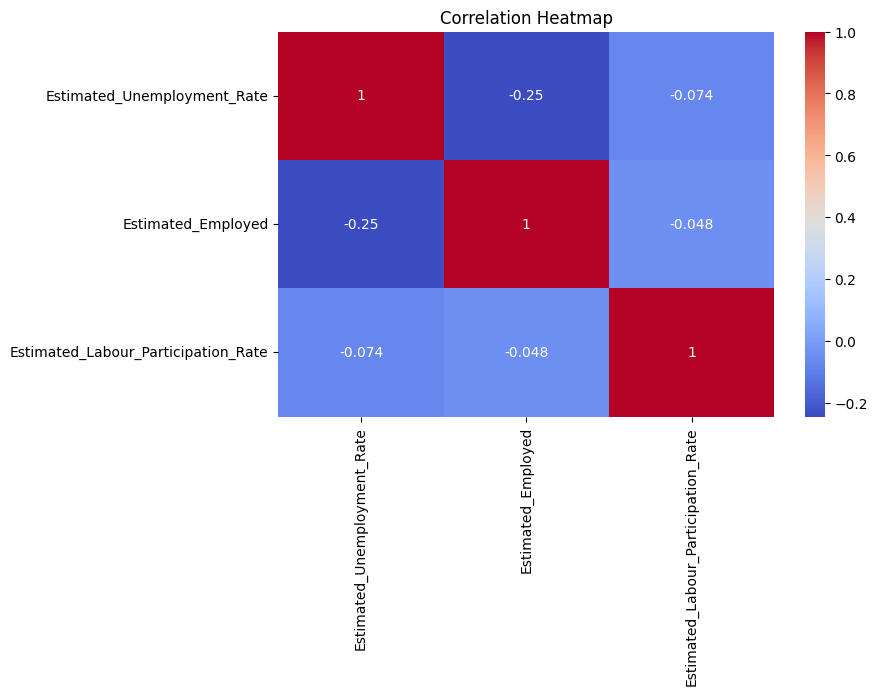

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


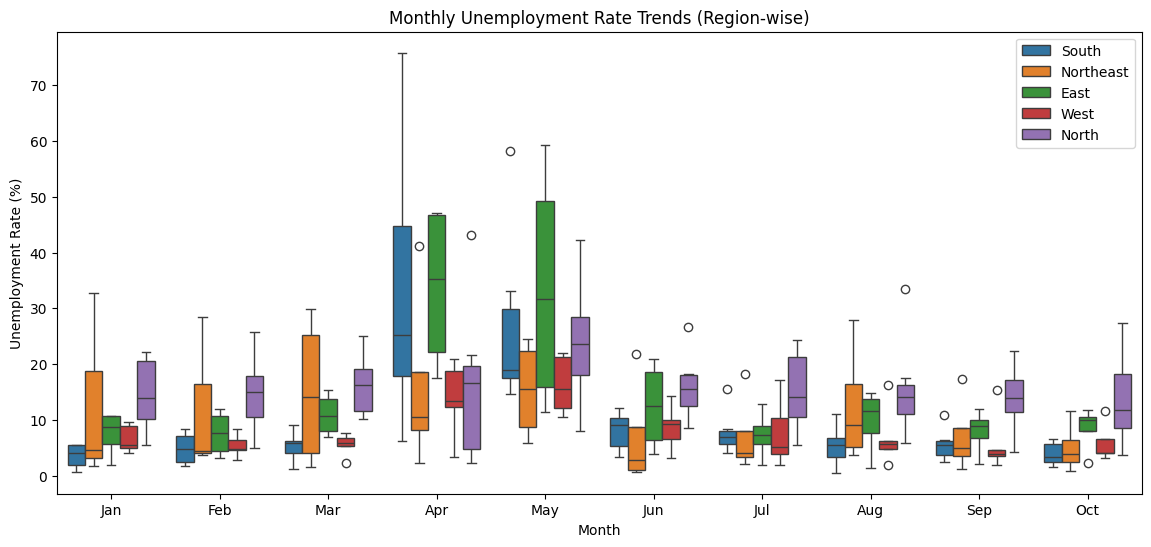

In [ ]:
df['Month'] = df['Date'].dt.strftime('%b')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Month', y='Estimated_Unemployment_Rate', hue='Region', data=df)
plt.title('Monthly Unemployment Rate Trends (Region-wise)')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper right')
plt.show()


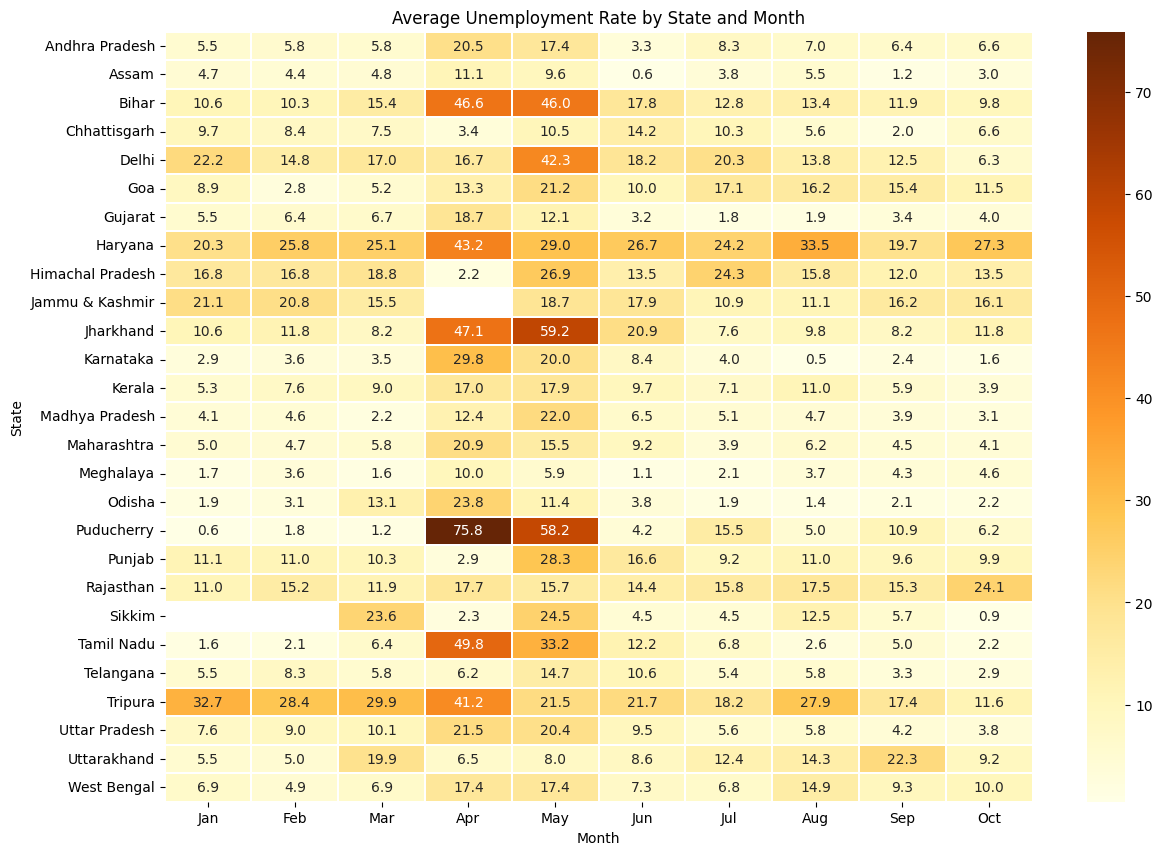

In [ ]:
df['Month'] = df['Date'].dt.strftime('%b')

pivot = df.pivot_table(values='Estimated_Unemployment_Rate', index='State', columns='Month', aggfunc='mean')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct']
pivot = pivot[month_order]

plt.figure(figsize=(14, 10))
sns.heatmap(pivot, cmap="YlOrBr", linewidths=0.3, annot=True, fmt=".1f")
plt.title("Average Unemployment Rate by State and Month")
plt.xlabel("Month")
plt.ylabel("State")
plt.show()


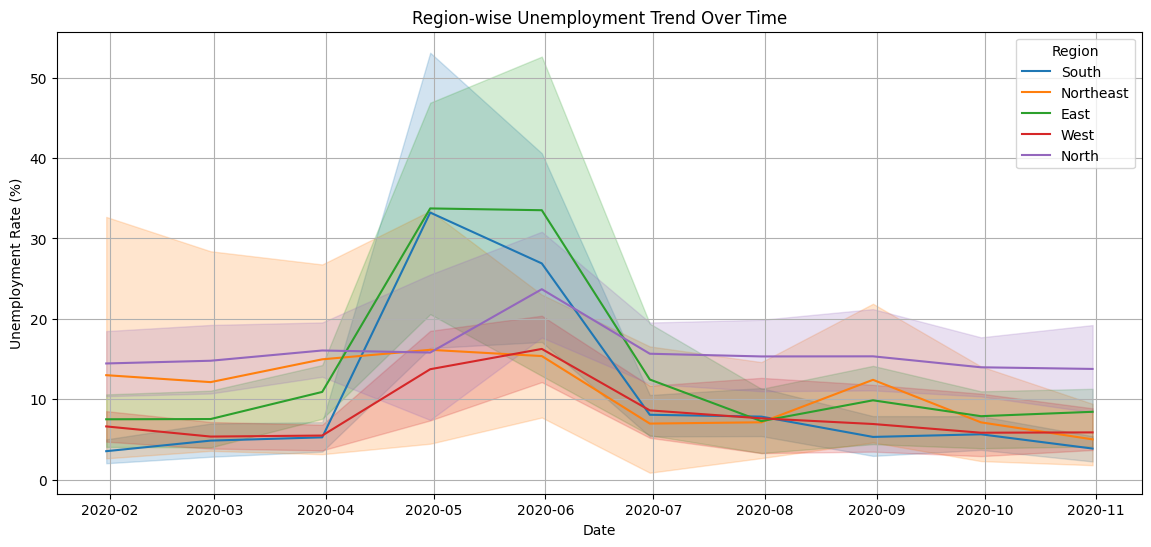

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Estimated_Unemployment_Rate', hue='Region')
plt.title('Region-wise Unemployment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


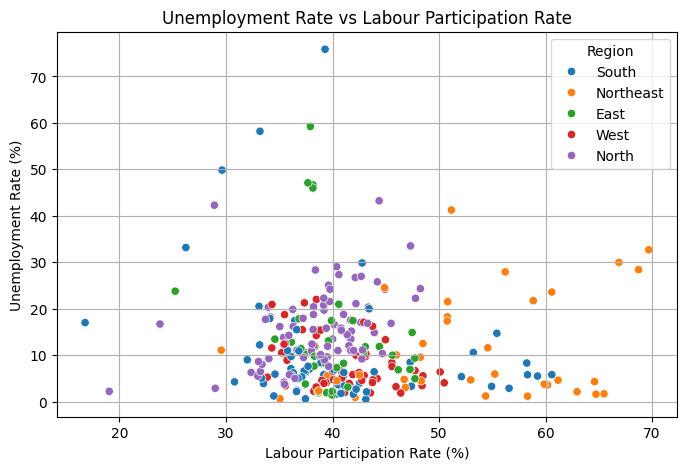

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Estimated_Labour_Participation_Rate', y='Estimated_Unemployment_Rate', hue='Region')
plt.title('Unemployment Rate vs Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


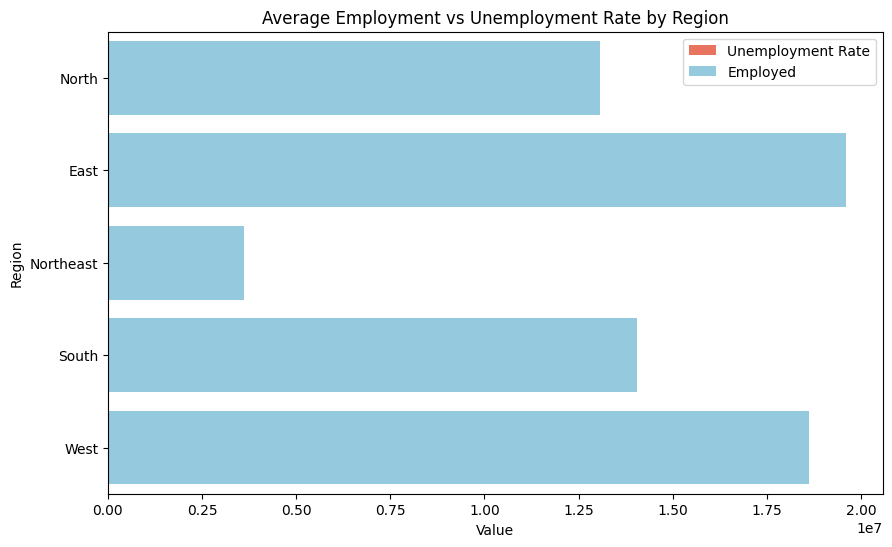

In [ ]:
plt.figure(figsize=(10, 6))
region_avg = df.groupby('Region')[['Estimated_Unemployment_Rate', 'Estimated_Employed']].mean().reset_index()

sns.barplot(data=region_avg.sort_values(by='Estimated_Unemployment_Rate', ascending=False),
            x='Estimated_Unemployment_Rate', y='Region', color='tomato', label='Unemployment Rate')
sns.barplot(data=region_avg.sort_values(by='Estimated_Unemployment_Rate', ascending=False),
            x='Estimated_Employed', y='Region', color='skyblue', label='Employed')

plt.title('Average Employment vs Unemployment Rate by Region')
plt.xlabel('Value')
plt.legend()
plt.show()


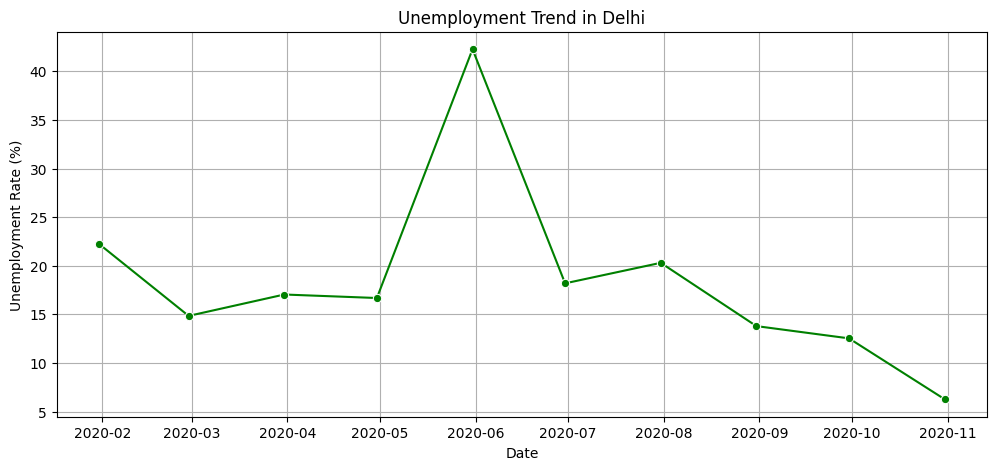

In [ ]:
state_name = 'Delhi'
delhi_df = df[df['State'] == state_name]

plt.figure(figsize=(12, 5))
sns.lineplot(data=delhi_df, x='Date', y='Estimated_Unemployment_Rate', marker='o', color='green')
plt.title(f'Unemployment Trend in {state_name}')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()
